Importing the Dependencies

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [81]:
dataf = pd.read_csv("/content/pima-data.csv")

In [82]:
dataf.shape

(768, 10)

In [83]:
dataf.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [84]:
dataf.isnull().values.any()

False

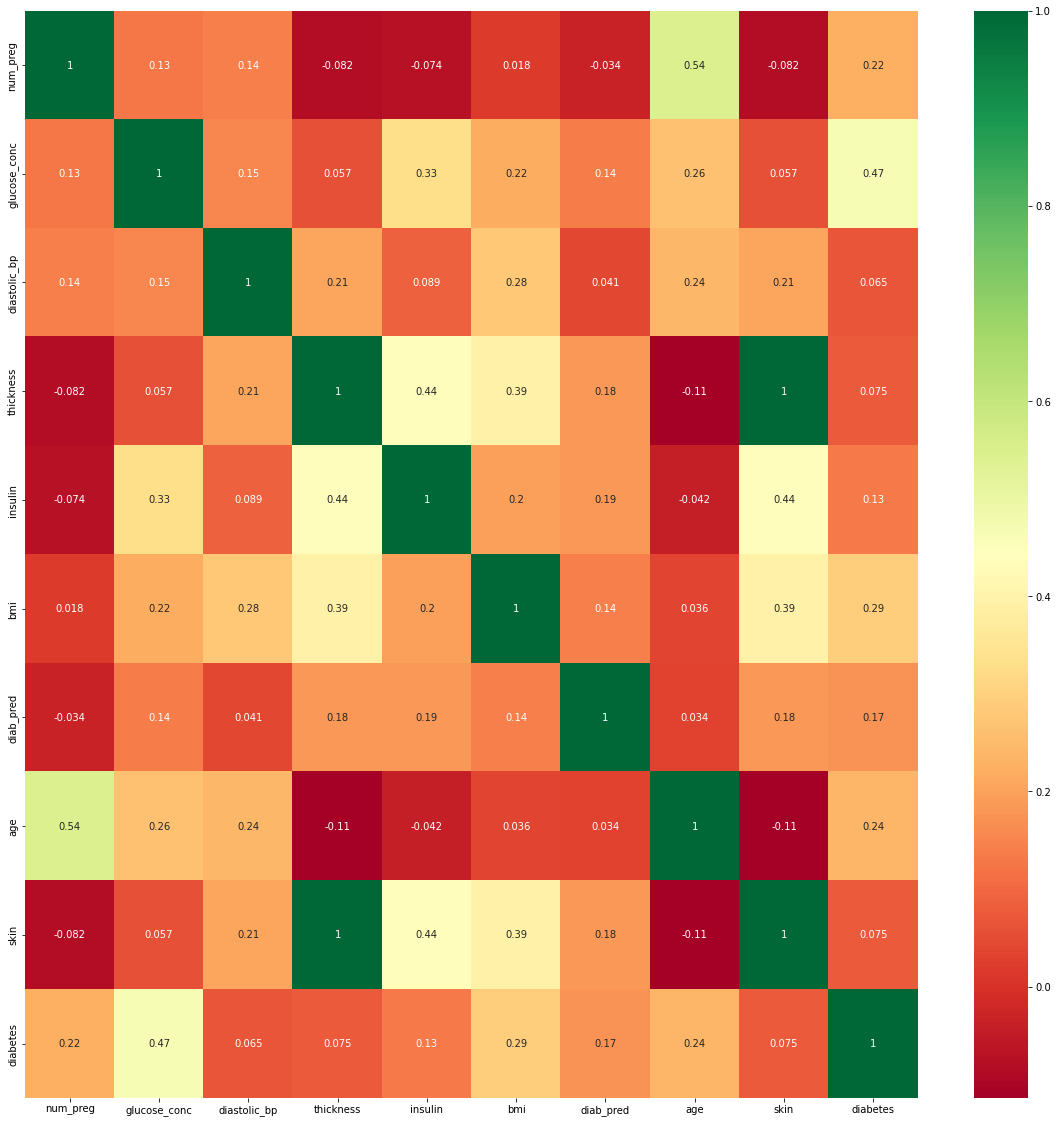

In [85]:
#get correlation of each features
corrmat=dataf.corr()
#get all the features like pregnancy,gulucose etc.
top_corr_features=corrmat.index
#create a figure size of 1440 x 1440 dimension.
plt.figure(figsize=(20,20))
g=sns.heatmap(dataf[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [86]:
#make true and false to 1 and 0
diabetes_map={True:1,False:0}

In [87]:
dataf['diabetes']=dataf['diabetes'].map(diabetes_map)

In [88]:
dataf.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [89]:
dataf.groupby('diabetes').mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fe6ab452550>>

In [90]:
#check your data set is balanced or not. check number of true and false training set and the ratio should be approx 1:2
diabetes_true_count=len(dataf.loc[data['diabetes']==True])
diabetes_false_count=len(dataf.loc[data['diabetes']==False])
diabetes_true_count, diabetes_false_count

(268, 500)

In [91]:
#for train-test-split which split yourr training test in x_train and y_train
import math

In [92]:
#shuffling is necessary to avoid bias or variance which we are doing using sample() method
data=dataf.sample(frac=1)


In [93]:
#this will drop tha diabetes column(1)
X=np.array(data.drop(["diabetes"],1))
#this will take only diabetes column
Y=np.array(data['diabetes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [94]:
#enter the spliting factor
s_f=0.70
#this means training data contains 70% of training set and test data contains remaining 30%

In [95]:
n_train=math.floor(s_f* X.shape[0])
n_test=math.floor((1-s_f)*X.shape[0])
x_train=X[:n_train]
y_train=Y[:n_train]
x_test=X[:n_test]
y_test=Y[:n_test]



Data exploration


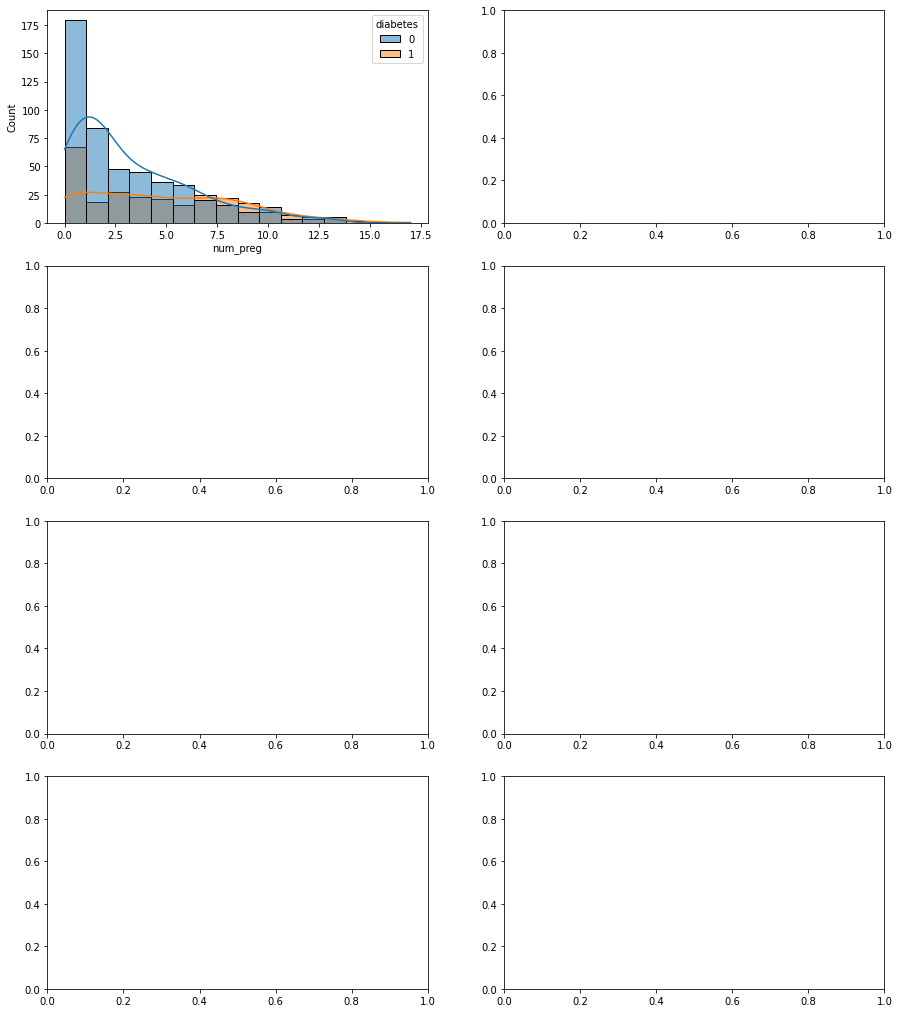

In [101]:
fig,axs=plt.subplots(4,2,figsize=(15,18))
color="Y10rBr"
sns.histplot(data=dataf, x="num_preg", kde=True, ax=axs[0,0], hue='diabetes')
sns.histplot(data=dataf, x="glucose_conc", kde=True, ax=axs[0,1], hue='diabetes')
sns.histplot(data=dataf, x="diastolic_bp", kde=True, ax=axs[1,0], hue='diabetes')
sns.histplot(data=dataf, x="diastolic_bp", kde=True, ax=axs[1,0], hue='diabetes')

In [ ]:
feature_columns=['num_peg','gulucose_conc','diastolic_bp','insulin','bmi','diabpred','age','skin']
prediction_class=['diabetes']

In [ ]:
#to manage 0 entered data
print("total number of rows:{0}".format(len(data)))
print("total number of rows missing glucose_conc: {0}".format(len(data.loc[dataf['glucose_conc'] == 0])))
print("total number of rows missing diastolic_bp: {0}".format(len(data.loc[dataf['diastolic_bp'] == 0])))
print("total number of rows missing insulin: {0}".format(len(data.loc[dataf['insulin'] == 0])))
print("total number of rows missing bmi: {0}".format(len(data.loc[dataf['bmi'] == 0])))
print("total number of rows missing diab_pred: {0}".format(len(data.loc[dataf['diab_pred'] == 0])))
print("total number of rows missing age: {0}".format(len(data.loc[dataf['age'] == 0])))
print("total number of rows missing skin: {0}".format(len(data.loc[dataf['skin'] == 0])))

In [ ]:
#if we remove the rows and columns which contain 0 data will affect our learning algo so instead of removing we overwrite it by predicting common data for that particular column or row. We can do this using sklearn imputer
from sklearn.impute import SimpleImputer

In [ ]:
#we are using strategy of mean to predict the missing data. It will replace the missing value to the mean of that column
fill_values=SimpleImputer(missing_values=0,strategy="mean")

In [ ]:
x_train=fill_values.fit_transform(x_train)
x_test=fill_values.fit_transform(x_test)